<a href="https://colab.research.google.com/github/yvesheri4/Climatology-Congo/blob/main/CMSE820_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## CMSE 820 - Spring 2024
### Home work  1
### Yves HERI

In [196]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import pandas as pd

In [197]:
size = 16
params = {
   'axes.labelsize': size,
   'font.size': size,
   'legend.fontsize': size,
   'xtick.labelsize': size,
   'ytick.labelsize': size,
   'text.usetex': False,
   'axes.linewidth':2.75,
   'figure.figsize': [5, 5]
   }
plt.rcParams.update(params)

## Problem 1

Let us assume $\mathbf{y} = \mathbf{X}^T\beta+\mathbf{\epsilon}$, where $\mathbf{X}_i\in \mathbb{R}^P$ is not random  and $\epsilon \sim \mathcal{N}(0,1)$. Equivalently we can express the error as
\begin{equation}
   \mathbf{\epsilon} = \mathbf{y} - \mathbf{X}^T\beta
\end{equation}
this error follows a standard normal distribution, then we can express it by
\begin{equation*}
    \mathbf{L}(\mathbf{\epsilon}) = \left(2\pi\right)^{-n/2}\exp{\left\{-\frac{\mathbf{\epsilon}^T \mathbf{\epsilon}}{2} \right\}}
\end{equation*}
using \eqref{eq1} we obtain the likelihood function as a function of $\beta$
\begin{equation}
    \mathbf{L}(\beta;X,Y) = \left(2\pi\right)^{-n/2}\exp{\left\{-\frac{\left( \mathbf{y} - \mathbf{X}^T\beta \right)^T \left( \mathbf{y} - \mathbf{X}^T\beta \right)}{2} \right\}}
\end{equation}
Now let write  down the joint log likelihood $\mathcal{l}(\beta) = \log{\mathbf{L}(\beta)}$, this gives (ignoring the constant $-(n/2)\log(2\pi)$ )
\begin{equation*}
    \mathcal{l}(\beta) = -\frac{1}{2}\left( \left(\mathbf{y} - \mathbf{X}^T\beta \right)^T \left( \mathbf{y} - \mathbf{X}^T\beta \right) \right) = -\frac{1}{2}\| \mathbf{y} - \mathbf{X}^T\beta \|^2
\end{equation*}
We \textbf{retrieve the expression of the least-squares method} (notice the negative sign in front). Thus, the maximum likelihood estimate can be found as
\begin{equation}
    \hat{\beta}^{MLE} = \text{arg}\max_\beta \mathcal{l}(\beta) = \text{arg}\min_\beta \| \mathbf{y} - \mathbf{X}^T\beta \|^2
\end{equation}
Differentiate with respect to $\beta$ and set the derivative equal to 0 for $\beta=\hat{\beta}^{MLE}$. This yields
\begin{equation}
    \frac{\partial \mathcal{l}(\beta)}{\partial \beta} =-2\mathbf{X}\mathbf{y} +2\mathbf{X}\mathbf{X}^T \hat{\beta}^{MLE} = 0
\end{equation}
we get the normal equation
\begin{equation}
     \mathbf{X}\mathbf{X}^T\hat{\beta}^{MLE} = \mathbf{X}\mathbf{y}
\end{equation}
then the maximum likelihood estimate is
\begin{equation}
\hat{\beta}^{MLE} = \left(\mathbf{X}\mathbf{X}^T\right)^{-1}\mathbf{X}\mathbf{y}
\end{equation}
Thus, the maximum likelihood and the ordinary least-squares methods give the same estimates of $\beta$.

## Problem 2

### Part (a): Show that $\hat{\beta}+c\mathbf{v}$ is a minimizer

We consider $\hat{\beta}$ to be a minimizer of the least-squares criterion $\| \mathbf{y} - \mathbf{X}^T\beta \|^2$ thus
\begin{equation}
\hat{\beta} = \text{arg}\min_\beta \| \mathbf{y} - \mathbf{X}^T\beta \|^2
\end{equation}
then for all vector $\beta_*$ we have
 \begin{equation}
 \| \mathbf{y} - \mathbf{X}^T\hat{\beta} \|^2\leq
 \| \mathbf{y} - \mathbf{X}^T\beta_* \|^2
 \end{equation}
now let us consider a given $\beta_* = \hat{\beta}+c\mathbf{v}$, for $\mathbf{v}\in \mathbb{R}^p$ a vector such that $\mathbf{X}^T\mathbf{v} =0$. Thus from  \eqref{eq7} we get
 \begin{equation}
 \| \mathbf{y} - \mathbf{X}^T\hat{\beta} \|^2\leq
 \| \mathbf{y} - \mathbf{X}^T\left(\hat{\beta}+c\mathbf{v} \right) \|^2
 % \label{eq7}
 \end{equation}
expanding the right-hand side we get
 \begin{equation}
 \| \mathbf{y} - \mathbf{X}^T\hat{\beta} \|^2\leq
 \| \mathbf{y} - \mathbf{X}^T\hat{\beta}-c\mathbf{X}^T\mathbf{v} \|^2
 % \label{eq7}
 \end{equation}
 the property  $\mathbf{X}^T\mathbf{v} =0$ leads to
 \begin{equation}
 \| \mathbf{y} - \mathbf{X}^T\hat{\beta} \|^2=
 \| \mathbf{y} - \mathbf{X}^T\hat{\beta} \|^2
 \end{equation}
this proves that
 \begin{equation}
 \| \mathbf{y} - \mathbf{X}^T\hat{\beta} \|^2=
 \| \mathbf{y} - \mathbf{X}^T\beta_* \|^2
 \end{equation}
Implying that $\beta_* = \hat{\beta}+c\mathbf{v}$ is also a minimizer.

### Part (b): What $\mathbf{v}$ satisfy $\mathbf{X}^T\mathbf{v}=0$

The condition $\mathbf{X}^T\mathbf{v} =0$, assuming $x_1,\dots,x_p$ are linearly independent, implies that for each $i$, the dot product $x_i^T\mathbf{v}=0$, meaning the vector $\mathbf{v}$ is orthogonal to each of the vectors $x_i$. In other word the vector $\mathbf{v}$ has to be perpendicular to the columns space of $\mathbf{X}^T$.

### Part (c):


## Problem 3

We consider the following model
\begin{equation}
    \mathbf{y} = \mathbf{X}^T\beta + \mathbf{\epsilon}
\end{equation}
where $\mathbf{\epsilon}_i \sim \mathcal{N}(0,1)$, $\mathbf{X}_i \sim \mathcal{N}(0,I_{p\times p})$ and $\beta \in \mathbb{R}^p$ with $\beta_{[1]}=1$ $\beta_{[2]}=-2$ and the rest of $\beta_{[j]}=0$.
\subsubsection*{Part (a): Calculate $\hat{\beta}^{ols}$}
The ordinary least-squares estimates is expressed as
\begin{equation}
\hat{\beta}^{ols} = \left(\mathbf{X}\mathbf{X}^T\right)^{-1}\mathbf{X}\mathbf{y}
\end{equation}
To obtain this estimate, we initially simulate the $\mathbf{y}$'s based on the equation \eqref{eq12}. Using the Python function \texttt{numpy.random.normal} to generate the error vector with a sample size of 100. And the function \texttt{numpy.random.multivariate\_normal} to generate the matrix $\mathbf{X}$ with 100 columns and $p$ lines. \\

\noindent
Thus for $p=5$ the ordinary least-squares estimate is shown it the following table



In [198]:
def least_square(p,size):
  sample_size = size
  eps = np.random.normal(0, 1, sample_size)

  beta = np.zeros(p)
  beta[:2] = 1,-2

  mean = np.zeros(p)
  cov = np.identity(p)  # diagonal covariance
  X = np.random.multivariate_normal(mean, cov, sample_size).T
  X[0] = np.ones(sample_size)

  Y = X.T@beta + eps
  beta_ols = inv(X@X.T)@X@Y

  Y_tild = X.T@beta_ols

  MSE = np.mean(np.square(Y - Y_tild)) ###

  return eps,X,Y,beta_ols,MSE

In [199]:
p = 5
size = 100
epsilon,X,Y,beta_ols,PE = least_square(p,size)

$ϵ ∼ N(0,1)$ for a sample size of 100.

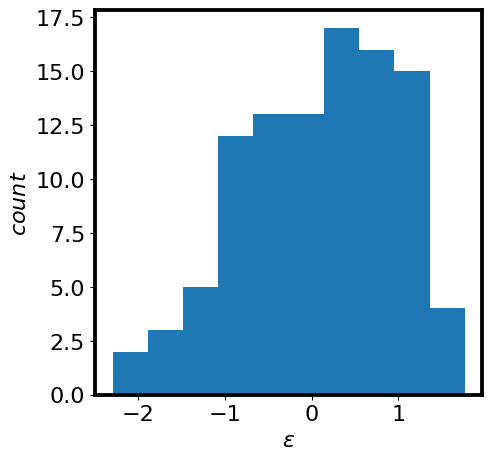

In [200]:
plt.hist(epsilon)
plt.ylabel("$count$")
plt.xlabel("$\epsilon$")
plt.show()

$X ∼ N(0,I_{p\times p})$ for a sample size of 100.

In [201]:
# print(X)

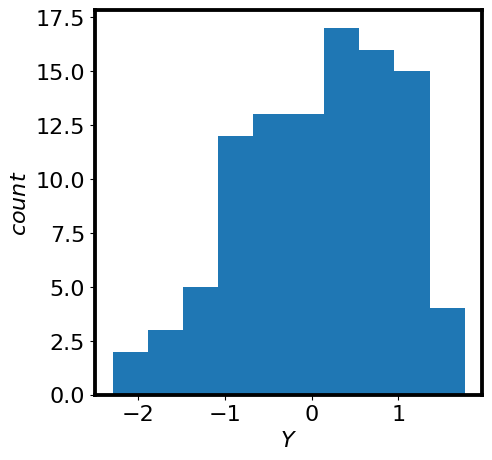

In [202]:
# print(Y)
plt.hist(epsilon)
plt.ylabel("$count$")
plt.xlabel("$Y$")
plt.show()

$$\hat{\beta}^{ols} = (XX^T)^{-1}XY $$

In [203]:
beta_ols

array([ 1.09277299, -2.00896212, -0.10602978,  0.10625047, -0.0261413 ])

### Part (b): in-sample prediction error ($PE_{in}$)

We use the same $\{\mathbf{X}_i\}$ generated from the previous part and we find another vector $\tilde{\mathbf{y}}$ using $\hat{\beta}^{ols}$ such that
\begin{equation}
    \tilde{\mathbf{y}} =\mathbf{X}^T\hat{\beta}^{ols}
\end{equation}
from this we calculate the in-sample prediction error ($PE_{in}$)
\begin{equation}
    PE_{in} = \mathbb{E}\left(\frac{1}{N}\sum_{i=1}^N \left(\mathbf{y}_i - \tilde{\mathbf{y}}_i\right)^2   \right)
\end{equation}
In this part we calculate one realization of $PE_{in}$, we run only one simulation (the expectation in \eqref{eqPE} is not considered), and obtain

In [204]:
PE

0.7564112821033352

### Part (c): in-sample prediction error ($PE_{in}$)

We repeat (a) - (b) 5000 times and take average of those 5000 calculated $PE_{in}$. We have
an approximate $PE_{in}$ using \eqref{eqPE}
$$
PE_{in} = 0.949
$$

For 5000 simulations, we find
$$PE_{in} = E\left\{\frac{1}{N}\sum_{i=1}^N\left(y_i - x_i^T\hat{\beta}^{ols}  \right)\right\} $$

In [205]:
num_sim = 5000
PE_arr = np.zeros(num_sim)
for i in range(num_sim):
  PE_arr[i] = least_square(5,100)[4]
PE_avg = np.mean(PE_arr)
PE_avg

0.9495770206995551

### Part (d): $PE_{in}$ for $p$=10, 40, 80

We repeat the same procedure for $p = 10,\; 40,\; 80$. The variation of the in-sample prediction error as a function of $p$ is given in the following figure. The trend is downward; we note a reduction in the in-sample prediction error as the variable $p$ increases. This observation indicates that a more feature-rich dataset leads to improved predictions.

We repeat the same procedure for p = 10, 40, 80.

In [206]:
num_sim = 5000
p_ = [5,10,40,80]
PE_arr = np.zeros([len(p_),num_sim])
PE_avg = np.zeros(len(p_))
for j in range(len(p_)):
  for i in range(num_sim):
    PE_arr[j][i] = least_square(p_[j],100)[4]
  PE_avg[j] = np.mean(PE_arr[j])

[0.9465257  0.90103801 0.59902847 0.19933312]


Text(0.5, 0, '$p$')

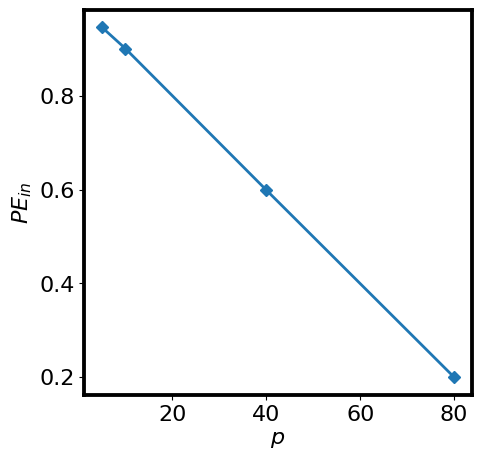

In [207]:
print(PE_avg)
plt.plot(p_,PE_avg,marker='D',lw=2)
plt.ylabel("$PE_{in}$")
plt.xlabel("$p$")
# plt.xscale("log")

We implement the following model using Python
\begin{equation}
    y_i = \beta_{[1]}^*x_{i[1]}+\beta_{[2]}^*x_{i[2]}+\epsilon_i
\end{equation}
where $\mathbb{E}(\epsilon_i)=0$, $\text{Var}(\epsilon_i)=1$, $\text{Cov}(\epsilon_i,\epsilon_j)=0$ and $\beta = (-1,2)^T$. We also assume $x_i\sim N(0,\Sigma_x)$ with
\begin{equation}
    \Sigma_x = \text{Cov}(x_i) =
    \begin{pmatrix}
1 & 0.9999\\
0.9999 & 1
    \end{pmatrix}
\end{equation}
We repeat 2000 times the following steps,  with the function \texttt{numpy.random.multivariate\_normal} we generate the matrix $\mathbf{X}$ with 50 columns and $2$ lines then $\mathbf{y}$ using \eqref{eq17}. Then obtain the ordinary least-squares estimate using \eqref{eq14} and the ridge regression estimates as
\begin{equation}
\hat{\beta}^{ridge} = \left(\mathbf{X}\mathbf{X}^T+\lambda I\right)^{-1}\mathbf{X}\mathbf{y}
\end{equation}
here $\lambda =0.005$ and $I$ is the $2\times 2$ indentity matrix.

### Part (a): Histograms for $\hat{\beta}^{ols}_{[1]}$ and $\hat{\beta}^{ridge}_{[1]}$

On the following figure we show the histograms  for the first component of $\hat{\beta}^{ols}_{[1]}$ and $\hat{\beta}^{ridge}_{[1]}$
\noindent
For identical matrices $\mathbf{X}$ and vectors $\mathbf{y}$, the estimates from ordinary least-squares and ridge regression overlap. This implies that both methods yield equivalent predictions.


In [208]:
sample_size = size
eps = np.random.normal(0, 1, sample_size)

In [209]:
mean = np.zeros(2)
cov = np.array([[1,0.9999],[0.9999,1]])  # diagonal covariance
print(cov)
X = np.random.multivariate_normal(mean, cov, sample_size).T

[[1.     0.9999]
 [0.9999 1.    ]]


In [210]:
def least_square2(size,p=2,Lambda = 0.005):
  sample_size = size
  eps = np.random.normal(0, 1, sample_size)

  beta = np.zeros(p)
  beta[:2] = -1,2
  # print(beta)

  mean = np.zeros(p)
  cov = np.array([[1,0.9999],[0.9999,1]])  # diagonal covariance
  X = np.random.multivariate_normal([0,0], cov, sample_size).T
  # X[0] = np.ones(sample_size)

  Y = X.T@beta + eps
  beta_ols = inv(X@X.T)@(X@Y)

  beta_ridge = inv(X@X.T+Lambda*np.identity(p))@(X@Y)

  return beta_ols[0],beta_ridge[0]

In [211]:
least_square2(size,p=2,Lambda = 0.005)

(5.088936474769996, 3.3130499954777766)

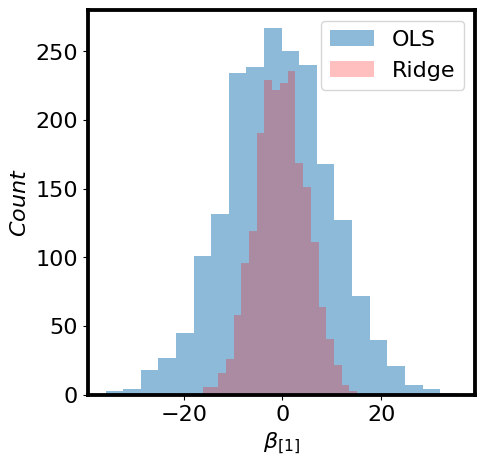

In [212]:
num_sim = 2000

beta_ols_arr = np.zeros(num_sim)
beta_ridge_arr = np.zeros(num_sim)

for i in range(num_sim):
  beta_ols_arr[i],beta_ridge_arr[i] = least_square2(50)
  # beta_ridge_arr[i] = least_square2(50)[1]

plt.hist(beta_ols_arr,alpha=0.5,bins=20,label ="OLS")
plt.hist(beta_ridge_arr,color="red",alpha=0.25,bins=20,label="Ridge")
plt.ylabel("$Count$")
plt.xlabel("$\\beta_{[1]}$")
# plt.xscale("log")

plt.legend()

In [213]:
count = 0
for i in range(num_sim):
  if np.abs(-1-beta_ridge_arr[i]) < np.abs(-1-beta_ols_arr[i]):
    count += 1

print(count)


1860
